# K-FCA Paper Example: Semiring Comparison

This notebook demonstrates the classic FCA example from the paper with continuous values.

## Dataset
- **5 objects**: 1, 2, 3, 4, 5
- **4 attributes**: a, b, c, d
- **Values**: Continuous [0, 0.25, 0.5, 0.75, 1.0]

## Original Binary Matrix from Paper:
```
    a  b  c  d
1   1  1  1  1
2   1  1  0  0
3   0  1  1  1
4   0  1  0  0
5   0  1  1  0
```

We convert 1s to continuous values while keeping 0s as 0.

In [1]:
# Setup
import sys
sys.path.insert(0, '..')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from src.context import KValuedContext
from src.galois import GaloisConnection
from src.lattice import ConceptLattice
from src.semirings import BooleanSemiring, MaxPlusSemiring, FuzzySemiring
from src.visualization import plot_context, plot_lattice

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Dataset Definition

We start with the classic paper example and assign continuous values.

In [2]:
# Define objects
objects = ["1", "2", "3", "4", "5"]

# Define attributes
attributes = ["a", "b", "c", "d"]

# Continuous-valued relation matrix
# Based on paper example, but with continuous values for 1s
relation = np.array([
    #   a     b     c     d
    [1.00, 1.00, 1.00, 1.00],  # 1: has all attributes
    [1.00, 0.75, 0.00, 0.00],  # 2: has a, b
    [0.00, 1.00, 0.75, 1.00],  # 3: has b, c, d
    [0.00, 0.50, 0.00, 0.00],  # 4: has b only
    [0.00, 1.00, 0.75, 0.00],  # 5: has b, c
], dtype=object)

print("Paper Example Dataset (5 objects × 4 attributes)")
print("=" * 60)
print()
print("Original Binary Matrix:")
print("    a  b  c  d")
print("1   1  1  1  1")
print("2   1  1  0  0")
print("3   0  1  1  1")
print("4   0  1  0  0")
print("5   0  1  1  0")
print()
print("Continuous-valued Matrix:")
df = pd.DataFrame(relation, index=objects, columns=attributes)
print(df)
print()
print("Note: 0s kept as 0, 1s converted to values in (0, 1]")

Paper Example Dataset (5 objects × 4 attributes)

Original Binary Matrix:
    a  b  c  d
1   1  1  1  1
2   1  1  0  0
3   0  1  1  1
4   0  1  0  0
5   0  1  1  0

Continuous-valued Matrix:
     a     b     c    d
1  1.0   1.0   1.0  1.0
2  1.0  0.75   0.0  0.0
3  0.0   1.0  0.75  1.0
4  0.0   0.5   0.0  0.0
5  0.0   1.0  0.75  0.0

Note: 0s kept as 0, 1s converted to values in (0, 1]


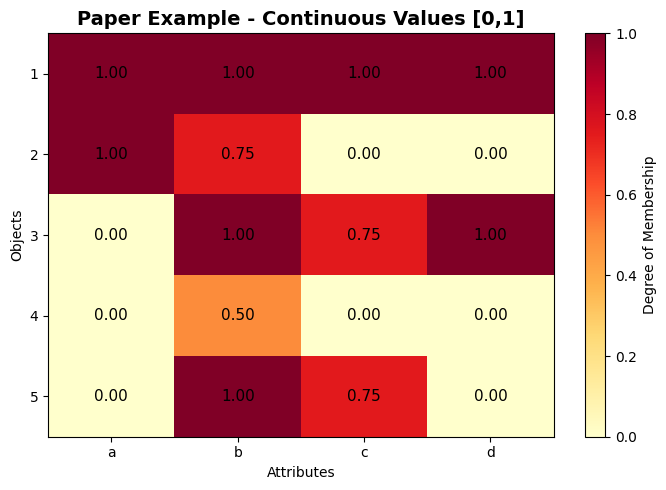

In [3]:
# Visualize as heatmap
plt.figure(figsize=(7, 5))

# Convert to float for visualization
relation_float = relation.astype(float)
im = plt.imshow(relation_float, cmap='YlOrRd', aspect='auto', vmin=0, vmax=1)

# Add colorbar
cbar = plt.colorbar(im, label='Degree of Membership')

# Add value annotations
for i in range(len(objects)):
    for j in range(len(attributes)):
        text = plt.text(j, i, f'{relation[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=11)

# Set ticks and labels
plt.xticks(range(len(attributes)), attributes)
plt.yticks(range(len(objects)), objects)
plt.title('Paper Example - Continuous Values [0,1]', fontsize=14, fontweight='bold')
plt.xlabel('Attributes')
plt.ylabel('Objects')
plt.tight_layout()
plt.show()

## 2. Boolean Semiring (Standard FCA)

**Threshold**: φ = 0.75

Convert continuous values to binary: values ≥ 0.75 → 1, else → 0

In [4]:
# Convert to binary using threshold
threshold = 0.75
binary_relation = (relation >= threshold).astype(object).astype(int)

print(f"Boolean Semiring (threshold φ = {threshold})")
print("=" * 60)
print()

df_binary = pd.DataFrame(binary_relation, index=objects, columns=attributes)
print("Binary Relation:")
print(df_binary)
print()

# Create Boolean context
boolean_semiring = BooleanSemiring()
boolean_context = KValuedContext(objects, attributes, binary_relation, boolean_semiring)

print("Context:")
print(boolean_context)

Boolean Semiring (threshold φ = 0.75)

Binary Relation:
   a  b  c  d
1  1  1  1  1
2  1  1  0  0
3  0  1  1  1
4  0  0  0  0
5  0  1  1  0

Context:
K-Valued Formal Context
Semiring: BooleanSemiring(B, ∨, ∧, 0, 1)

    |    a     |    b     |    c     |    d    
-----------------------------------------------
1   |    1     |    1     |    1     |    1    
2   |    1     |    1     |    0     |    0    
3   |    0     |    1     |    1     |    1    
4   |    0     |    0     |    0     |    0    
5   |    0     |    1     |    1     |    0    


In [5]:
# Build concept lattice
boolean_galois = GaloisConnection(boolean_context, pivot=1)
boolean_lattice = ConceptLattice(boolean_context, boolean_galois, method="objects")

print(f"Boolean Semiring: Found {len(boolean_lattice)} concepts")
print("=" * 60)
print()

# Display all concepts
for i in range(len(boolean_lattice)):
    objs = boolean_lattice.get_concept_objects(i)
    attrs = boolean_lattice.get_concept_attributes(i)
    
    print(f"Concept #{i}:")
    print(f"  Extent:  {{{', '.join(objs) if objs else '∅'}}}")
    print(f"  Intent:  {{{', '.join(attrs) if attrs else '∅'}}}")
    print()

Boolean Semiring: Found 5 concepts

Concept #0:
  Extent:  {1, 2, 3, 4, 5}
  Intent:  {∅}

Concept #1:
  Extent:  {1}
  Intent:  {a, b, c, d}

Concept #2:
  Extent:  {1, 2}
  Intent:  {a, b}

Concept #3:
  Extent:  {1, 3}
  Intent:  {b, c, d}

Concept #4:
  Extent:  {1, 3, 5}
  Intent:  {b, c}



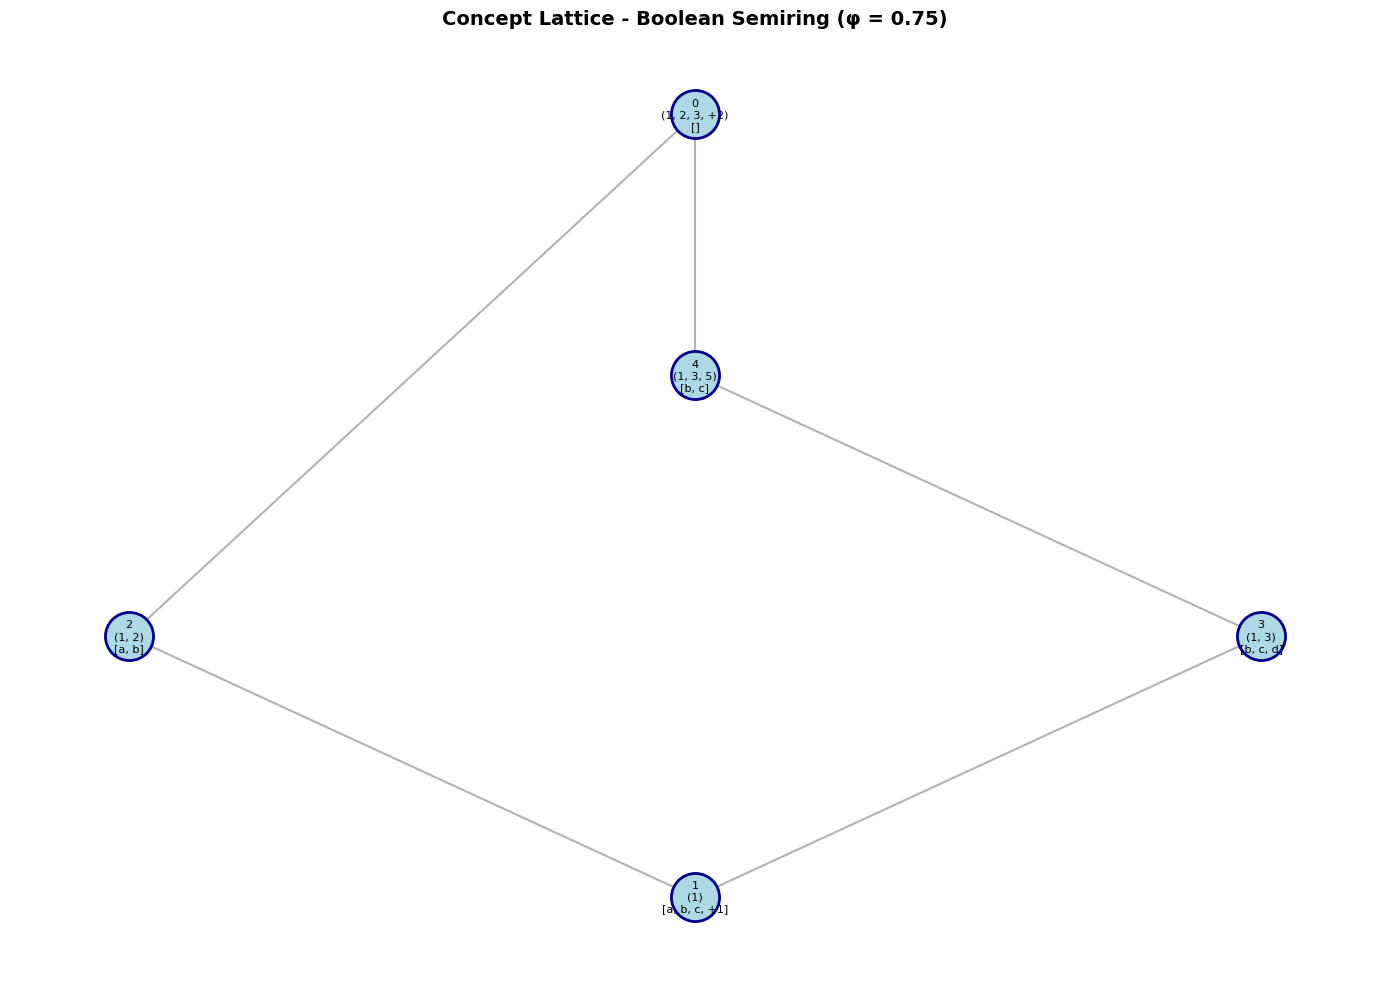

In [6]:
# Visualize Boolean lattice
fig = plot_lattice(boolean_lattice, figsize=(14, 10), layout="hierarchical",
                   title="Concept Lattice - Boolean Semiring (φ = 0.75)")
plt.tight_layout()
plt.show()

### Boolean Analysis

This should produce the classic lattice structure from the paper with 5 concepts:
- Top concept: All objects with shared attributes
- Middle concepts: Various object-attribute combinations
- Bottom concept: Empty extent with all attributes

## 3. Max-Plus Semiring (Tropical)

**Transformation**: log(value) for value > 0, -∞ for value = 0

**Pivot**: φ = log(0.75) ≈ -0.288

In [7]:
# Transform to log-scale for Max-Plus
maxplus_relation = np.zeros_like(relation, dtype=object)

for i in range(relation.shape[0]):
    for j in range(relation.shape[1]):
        val = float(relation[i, j])
        if val == 0:
            maxplus_relation[i, j] = float('-inf')
        else:
            maxplus_relation[i, j] = np.log(val)

print("Max-Plus Semiring (log-scale transformation)")
print("=" * 60)
print()

df_maxplus = pd.DataFrame(maxplus_relation, index=objects, columns=attributes)
print("Log-scaled Relation:")
print(df_maxplus)
print()

# Create Max-Plus context
maxplus_semiring = MaxPlusSemiring()
maxplus_context = KValuedContext(objects, attributes, maxplus_relation, maxplus_semiring)

print("Context:")
print(maxplus_context)

Max-Plus Semiring (log-scale transformation)

Log-scaled Relation:
     a         b         c    d
1  0.0       0.0       0.0  0.0
2  0.0 -0.287682      -inf -inf
3 -inf       0.0 -0.287682  0.0
4 -inf -0.693147      -inf -inf
5 -inf       0.0 -0.287682 -inf

Context:
K-Valued Formal Context
Semiring: MaxPlusSemiring(ℝ∪{-∞,∞}, max, +, -∞, 0)

    |    a     |    b     |    c     |    d    
-----------------------------------------------
1   |   0.0    |   0.0    |   0.0    |   0.0   
2   |   0.0    | -0.2876820724517809 |   -inf   |   -inf  
3   |   -inf   |   0.0    | -0.2876820724517809 |   0.0   
4   |   -inf   | -0.6931471805599453 |   -inf   |   -inf  
5   |   -inf   |   0.0    | -0.2876820724517809 |   -inf  


In [8]:
# Build concept lattice with pivot = log(0.75)
phi_maxplus = np.log(0.75)
maxplus_galois = GaloisConnection(maxplus_context, pivot=phi_maxplus)
maxplus_lattice = ConceptLattice(maxplus_context, maxplus_galois, method="objects")

print(f"Max-Plus Semiring: Found {len(maxplus_lattice)} concepts")
print(f"Pivot: φ = log(0.75) ≈ {phi_maxplus:.3f}")
print("=" * 60)
print()

# Display all concepts
for i in range(len(maxplus_lattice)):
    objs = maxplus_lattice.get_concept_objects(i)
    attrs = maxplus_lattice.get_concept_attributes(i)
    
    print(f"Concept #{i}:")
    print(f"  Extent:  {{{', '.join(objs) if objs else '∅'}}}")
    print(f"  Intent:  {{{', '.join(attrs) if attrs else '∅'}}}")
    print()

Max-Plus Semiring: Found 5 concepts
Pivot: φ = log(0.75) ≈ -0.288

Concept #0:
  Extent:  {1}
  Intent:  {a, b, c, d}

Concept #1:
  Extent:  {1, 2}
  Intent:  {a, b}

Concept #2:
  Extent:  {1, 3}
  Intent:  {b, c, d}

Concept #3:
  Extent:  {1, 2, 3, 4, 5}
  Intent:  {∅}

Concept #4:
  Extent:  {1, 3, 5}
  Intent:  {b, c}



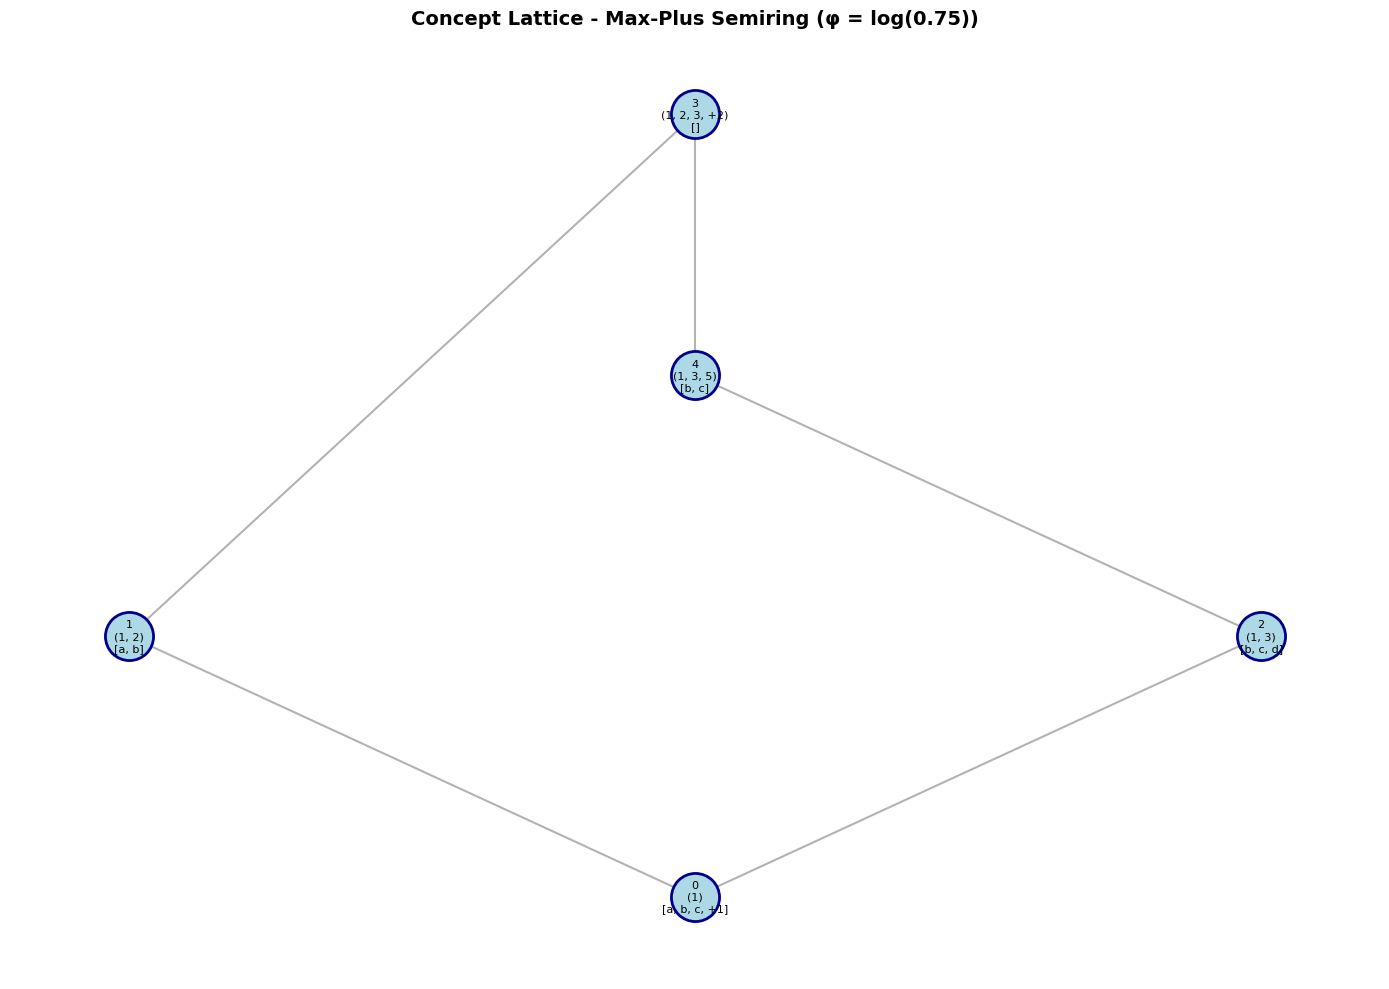

In [9]:
# Visualize Max-Plus lattice
fig = plot_lattice(maxplus_lattice, figsize=(14, 10), layout="hierarchical",
                   title="Concept Lattice - Max-Plus Semiring (φ = log(0.75))")
plt.tight_layout()
plt.show()

### Max-Plus Analysis

Max-Plus preserves continuous information and may produce a different concept structure due to:
- Emphasis on maximum values
- Log-scale operations
- Different groupings based on strongest attributes

## 4. Fuzzy FCA via α-cuts

**Main threshold**: α = 0.75

We explore multiple α levels to show the hierarchy of concepts.

In [10]:
# Apply α-cut at 0.75
alpha = 0.75
alpha_cut_relation = (relation >= alpha).astype(object).astype(int)

print(f"Fuzzy FCA with α-cut = {alpha}")
print("=" * 60)
print()

df_alpha = pd.DataFrame(alpha_cut_relation, index=objects, columns=attributes)
print("α-cut Relation:")
print(df_alpha)
print()

# Create Fuzzy context (using Boolean semiring on α-cut)
fuzzy_context = KValuedContext(objects, attributes, alpha_cut_relation, BooleanSemiring())
fuzzy_galois = GaloisConnection(fuzzy_context, pivot=1)
fuzzy_lattice = ConceptLattice(fuzzy_context, fuzzy_galois, method="objects")

print(f"Fuzzy FCA (α = {alpha}): Found {len(fuzzy_lattice)} concepts")
print("=" * 60)
print()

# Display all concepts
for i in range(len(fuzzy_lattice)):
    objs = fuzzy_lattice.get_concept_objects(i)
    attrs = fuzzy_lattice.get_concept_attributes(i)
    
    print(f"Concept #{i}:")
    print(f"  Extent:  {{{', '.join(objs) if objs else '∅'}}}")
    print(f"  Intent:  {{{', '.join(attrs) if attrs else '∅'}}}")
    print()

Fuzzy FCA with α-cut = 0.75

α-cut Relation:
   a  b  c  d
1  1  1  1  1
2  1  1  0  0
3  0  1  1  1
4  0  0  0  0
5  0  1  1  0

Fuzzy FCA (α = 0.75): Found 5 concepts

Concept #0:
  Extent:  {1, 2, 3, 4, 5}
  Intent:  {∅}

Concept #1:
  Extent:  {1}
  Intent:  {a, b, c, d}

Concept #2:
  Extent:  {1, 2}
  Intent:  {a, b}

Concept #3:
  Extent:  {1, 3}
  Intent:  {b, c, d}

Concept #4:
  Extent:  {1, 3, 5}
  Intent:  {b, c}



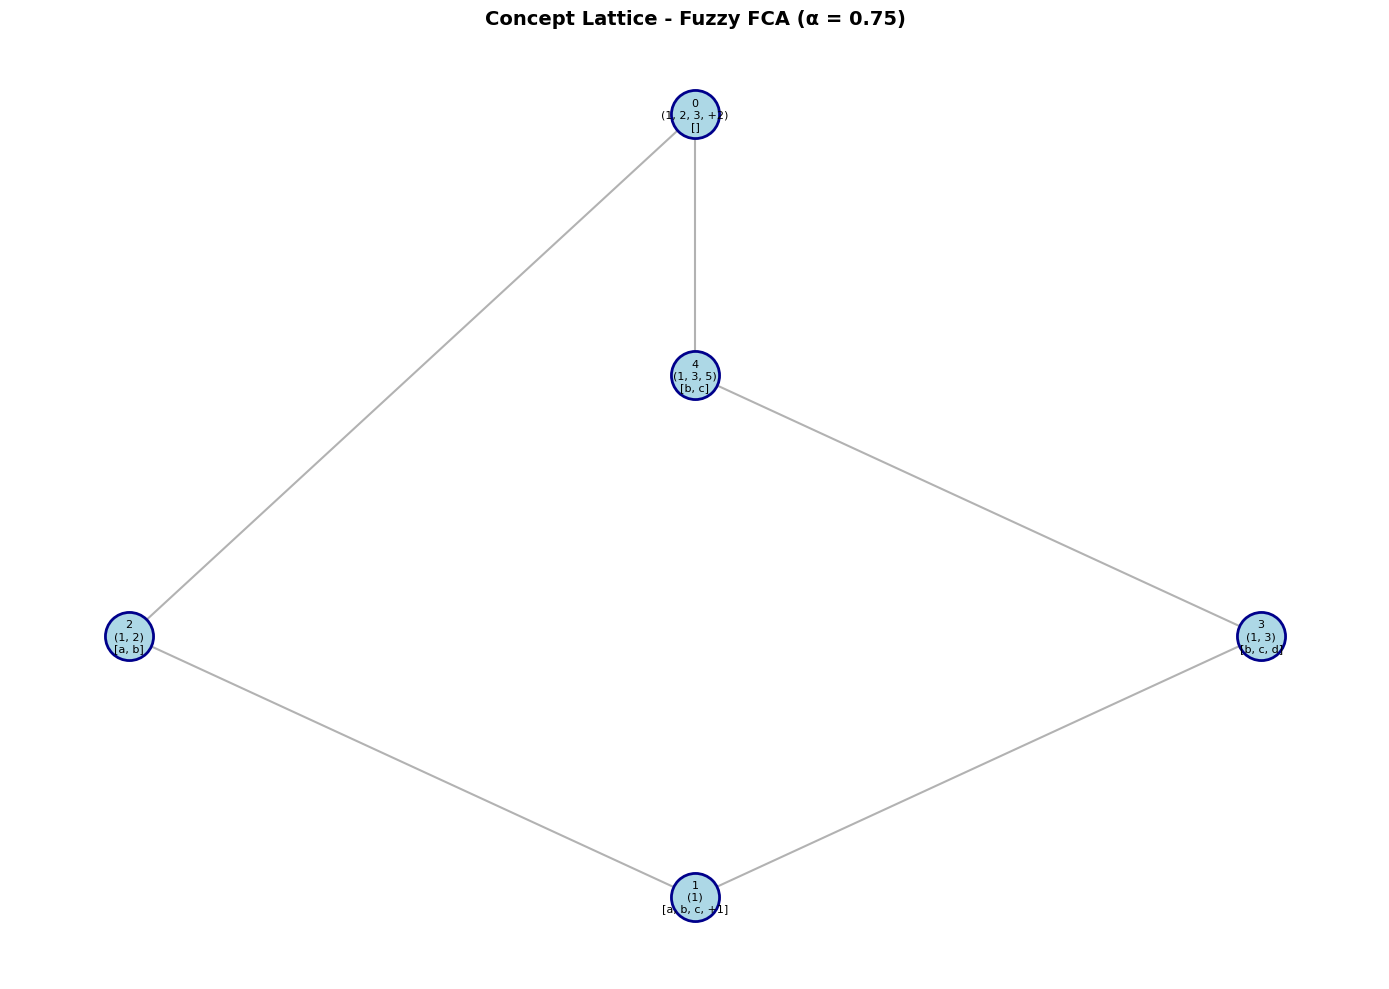

In [11]:
# Visualize Fuzzy lattice
fig = plot_lattice(fuzzy_lattice, figsize=(14, 10), layout="hierarchical",
                   title=f"Concept Lattice - Fuzzy FCA (α = {alpha})")
plt.tight_layout()
plt.show()

### Fuzzy α-cut Hierarchy

Explore multiple α levels to see how concepts emerge at different confidence thresholds.

In [12]:
# Explore multiple α-cuts
print("Fuzzy FCA: Concept Hierarchy at Different α Levels")
print("=" * 60)
print()

alpha_values = [0.0, 0.25, 0.5, 0.75, 1.0]
fuzzy_results = []

for alpha in alpha_values:
    # Apply α-cut
    alpha_rel = (relation >= alpha).astype(object).astype(int)
    ctx = KValuedContext(objects, attributes, alpha_rel, BooleanSemiring())
    gal = GaloisConnection(ctx, pivot=1)
    lat = ConceptLattice(ctx, gal, method="objects")
    
    fuzzy_results.append((alpha, len(lat)))
    
    # Describe
    if alpha == 0.0:
        desc = "All relations included (very loose)"
    elif alpha == 0.25:
        desc = "Low confidence threshold"
    elif alpha == 0.5:
        desc = "Medium confidence threshold"
    elif alpha == 0.75:
        desc = "High confidence threshold"
    else:
        desc = "Only exact matches (very restrictive)"
    
    print(f"α = {alpha:4.2f}: {len(lat):2d} concepts  - {desc}")

print()
print("Observation: Concept structure changes with α!")

Fuzzy FCA: Concept Hierarchy at Different α Levels

α = 0.00:  1 concepts  - All relations included (very loose)
α = 0.25:  5 concepts  - Low confidence threshold
α = 0.50:  5 concepts  - Medium confidence threshold
α = 0.75:  5 concepts  - High confidence threshold
α = 1.00:  5 concepts  - Only exact matches (very restrictive)

Observation: Concept structure changes with α!


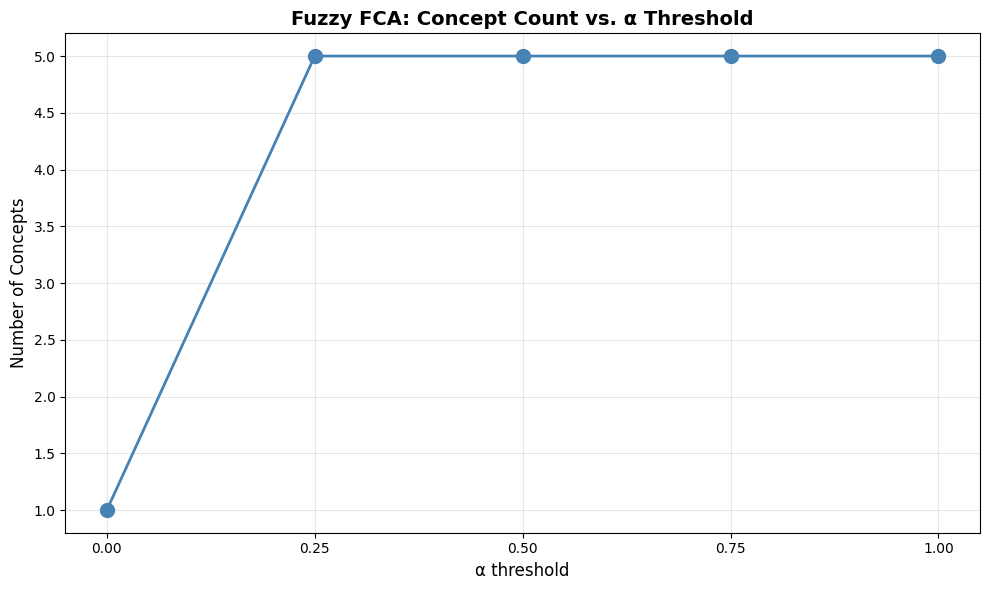

In [13]:
# Visualize α hierarchy
alphas, counts = zip(*fuzzy_results)

plt.figure(figsize=(10, 6))
plt.plot(alphas, counts, 'o-', linewidth=2, markersize=10, color='steelblue')
plt.xlabel('α threshold', fontsize=12)
plt.ylabel('Number of Concepts', fontsize=12)
plt.title('Fuzzy FCA: Concept Count vs. α Threshold', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(alphas)
plt.tight_layout()
plt.show()

## 5. Min-Plus Semiring (Arctic)

**Transformation**: 1 - value (inverted) for value > 0, ∞ for value = 0

**Pivot**: φ = 0.25 (after inversion, equivalent to original 0.75)

Min-Plus emphasizes the **weakest link** - all attributes must be strong.

In [14]:
# Import Min-Plus semiring
from src.semirings import MinPlusSemiring

# Transform using inversion for Min-Plus
minplus_relation = np.zeros_like(relation, dtype=object)

for i in range(relation.shape[0]):
    for j in range(relation.shape[1]):
        val = float(relation[i, j])
        if val == 0:
            minplus_relation[i, j] = float('inf')
        else:
            # Invert: high value → low number (wins in min)
            minplus_relation[i, j] = 1.0 - val

print("Min-Plus Semiring (inverted values: 1-x)")
print("=" * 60)
print()

df_minplus = pd.DataFrame(minplus_relation, index=objects, columns=attributes)
print("Inverted Relation:")
print(df_minplus)
print()

# Create Min-Plus context
minplus_semiring = MinPlusSemiring()
minplus_context = KValuedContext(objects, attributes, minplus_relation, minplus_semiring)

print("Context:")
print(minplus_context)

Min-Plus Semiring (inverted values: 1-x)

Inverted Relation:
     a     b     c    d
1  0.0   0.0   0.0  0.0
2  0.0  0.25   inf  inf
3  inf   0.0  0.25  0.0
4  inf   0.5   inf  inf
5  inf   0.0  0.25  inf

Context:
K-Valued Formal Context
Semiring: MinPlusSemiring(ℝ∪{-∞,∞}, min, +, ∞, 0)

    |    a     |    b     |    c     |    d    
-----------------------------------------------
1   |   0.0    |   0.0    |   0.0    |   0.0   
2   |   0.0    |   0.25   |   inf    |   inf   
3   |   inf    |   0.0    |   0.25   |   0.0   
4   |   inf    |   0.5    |   inf    |   inf   
5   |   inf    |   0.0    |   0.25   |   inf   


In [15]:
# Build concept lattice with pivot = 0.25 (corresponds to original 0.75)
phi_minplus = 0.25
minplus_galois = GaloisConnection(minplus_context, pivot=phi_minplus)
minplus_lattice = ConceptLattice(minplus_context, minplus_galois, method="objects")

print(f"Min-Plus Semiring: Found {len(minplus_lattice)} concepts")
print(f"Pivot: φ = {phi_minplus} (inverted from original 0.75)")
print("=" * 60)
print()

# Display all concepts
for i in range(len(minplus_lattice)):
    objs = minplus_lattice.get_concept_objects(i)
    attrs = minplus_lattice.get_concept_attributes(i)
    
    print(f"Concept #{i}:")
    print(f"  Extent:  {{{', '.join(objs) if objs else '∅'}}}")
    print(f"  Intent:  {{{', '.join(attrs) if attrs else '∅'}}}")
    print()

Min-Plus Semiring: Found 4 concepts
Pivot: φ = 0.25 (inverted from original 0.75)

Concept #0:
  Extent:  {1, 2, 3, 4, 5}
  Intent:  {a, b, c, d}

Concept #1:
  Extent:  {2, 4}
  Intent:  {a, b, c, d}

Concept #2:
  Extent:  {2, 3, 4, 5}
  Intent:  {b, c, d}

Concept #3:
  Extent:  {4}
  Intent:  {a, b, c, d}



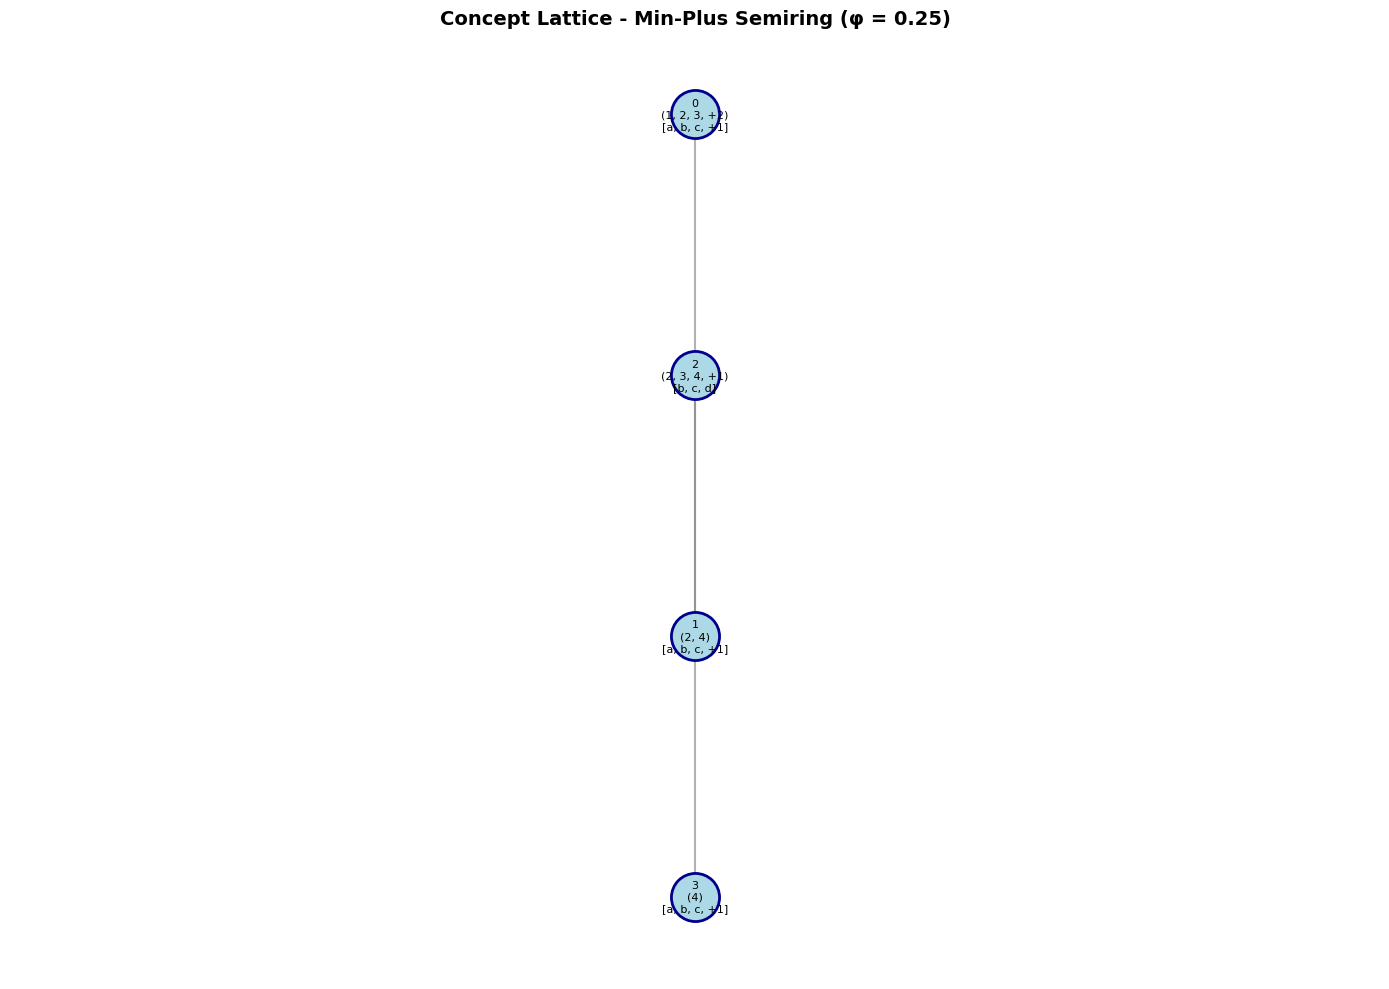

In [16]:
# Visualize Min-Plus lattice
fig = plot_lattice(minplus_lattice, figsize=(14, 10), layout="hierarchical",
                   title="Concept Lattice - Min-Plus Semiring (φ = 0.25)")
plt.tight_layout()
plt.show()

### Min-Plus Analysis

Min-Plus is very restrictive:
- **min operation** = "weakest link"
- ALL objects must strongly have an attribute for it to be shared
- Often produces fewer concepts than Max-Plus
- Good for "all must be strong" scenarios

## 6. Final Comparison

Let's compare all four semiring approaches side-by-side.

In [17]:
# Comparison table
print("SEMIRING COMPARISON SUMMARY")
print("=" * 90)
print()

comparison = [
    ["Semiring", "Pivot/α", "Data Transform", "# Concepts", "Key Characteristic"],
    ["-" * 15, "-" * 10, "-" * 20, "-" * 10, "-" * 35],
    ["Boolean", "0.75", "Binary {0,1}", f"{len(boolean_lattice)}", "Hard threshold, simple"],
    ["Max-Plus", "log(0.75)", "Log-scaled ℝ", f"{len(maxplus_lattice)}", "Max emphasizes strongest"],
    ["Min-Plus", "0.25", "Inverted (1-x)", f"{len(minplus_lattice)}", "Min emphasizes weakest link"],
    ["Fuzzy", "0.75", "α-cut binary", f"{len(fuzzy_lattice)}", "Hierarchy at multiple levels"],
]

for row in comparison:
    print(f"{row[0]:15s} | {row[1]:10s} | {row[2]:20s} | {row[3]:10s} | {row[4]:35s}")

print()
print("Key Insights:")
print("-" * 90)
print("• Boolean: Same as Fuzzy at α=0.75 (both use threshold)")
print("• Max-Plus: Preserves continuous info, emphasizes maximum")
print("• Min-Plus: Very restrictive, emphasizes minimum (weakest link)")
print("• Fuzzy: Provides hierarchy across multiple confidence levels")

SEMIRING COMPARISON SUMMARY

Semiring        | Pivot/α    | Data Transform       | # Concepts | Key Characteristic                 
--------------- | ---------- | -------------------- | ---------- | -----------------------------------
Boolean         | 0.75       | Binary {0,1}         | 5          | Hard threshold, simple             
Max-Plus        | log(0.75)  | Log-scaled ℝ         | 5          | Max emphasizes strongest           
Min-Plus        | 0.25       | Inverted (1-x)       | 4          | Min emphasizes weakest link        
Fuzzy           | 0.75       | α-cut binary         | 5          | Hierarchy at multiple levels       

Key Insights:
------------------------------------------------------------------------------------------
• Boolean: Same as Fuzzy at α=0.75 (both use threshold)
• Max-Plus: Preserves continuous info, emphasizes maximum
• Min-Plus: Very restrictive, emphasizes minimum (weakest link)
• Fuzzy: Provides hierarchy across multiple confidence levels


## 7. Summary

### Semiring Selection Guide

| Semiring | Best For | Operation Style |
|----------|----------|----------------|
| **Boolean** | Binary classification, standard FCA | Hard cutoff at threshold |
| **Max-Plus** | Optimization, "best of" scenarios | Emphasizes strongest attributes |
| **Min-Plus** | Bottleneck analysis, quality control | Emphasizes weakest attributes |
| **Fuzzy** | Multi-level confidence analysis | Hierarchy of thresholds |

### Key Takeaway

**Same data, different algebraic structures reveal different insights!**

- Choose semiring based on your domain and analytical goals
- Each provides a different perspective on the same data
- Continuous values preserve information lost in binary discretization